# title
## By Svajune Klimasauskaite

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits import mplot3d
import datetime as dt     

%matplotlib inline

## Gather Data



In [10]:
#Load real estet owners
re_owner=pd.read_csv("https://raw.githubusercontent.com/vilnius/nekilnojamas-turtas/master/NT_sklypai_nuosavybe.csv", sep=';')
re_owner.sample(10)

,OBJ_ID,TEI_ID,SAVININKAS,NAUDTEISE,DALIS
39000,20796559,37045324,Fizinis,NaudTeisė: Nuosavybės teisė,"Dalis: 100,00%"
36898,20728119,44255791,Fizinis,NaudTeisė: Nuosavybės teisė,"Dalis: 100,00%"
3156,270632,22486960,Juridinis,NaudTeisė: Valstybės nuosavybė,"Dalis: 100,00%"
9964,624942,53534827,Fizinis,NaudTeisė: Nuosavybės teisė,"DalNr.: 1311 Dalis: 0,05%"
105029,"1,0101E+12",29962735,Fizinis,NaudTeisė: Nuosavybės teisė,"Dalis: 100,00%"
127005,"1,0101E+12",13130557,Fizinis,NaudTeisė: Nuosavybės teisė,"Dalis: 100,00%"
122915,"1,0101E+12",39315872,Fizinis,NaudTeisė: Nuosavybės teisė,"Dalis: 100,00%"
103993,"1,0101E+12",42622263,Fizinis,NaudTeisė: Nuosavybės teisė,"Dalis: 100,00%"
19778,851819,46420837,Fizinis,NaudTeisė: Nuosavybės teisė,"DalNr.: 64 Dalis: 0,19%"
18893,826028,51655613,Fizinis,NaudTeisė: Nuosavybės teisė,"Dalis: 100,00%"


## Assess Citizens

In [3]:
re_owner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140701 entries, 0 to 140700
Data columns (total 5 columns):
OBJ_ID        140701 non-null object
TEI_ID        140701 non-null int64
SAVININKAS    140701 non-null object
NAUDTEISE     140701 non-null object
DALIS         140701 non-null object
dtypes: int64(1), object(4)
memory usage: 5.4+ MB


In [4]:
re_owner.isnull().sum()

OBJ_ID        0
TEI_ID        0
SAVININKAS    0
NAUDTEISE     0
DALIS         0
dtype: int64

In [5]:
re_owner.nunique()

OBJ_ID         31568
TEI_ID        140701
SAVININKAS         2
NAUDTEISE          8
DALIS          50760
dtype: int64

In [6]:
re_owner.SAVININKAS.unique()

array(['Fizinis', 'Juridinis'], dtype=object)

In [7]:
re_owner.NAUDTEISE.unique()

array([' NaudTeisė: Nuosavybės teisė', ' NaudTeisė: Valstybės nuosavybė',
       ' NaudTeisė: Savivaldybės nuosavybė',
       ' NaudTeisė: Daikt.teisės neįregistruotos',
       ' NaudTeisė: Inv. fondo dalyvių nuosavybė',
       ' NaudTeisė: Valst. nuosav. (nuomos teisė)',
       ' NaudTeisė: Apskr. išnuom. valst. nuosav.',
       ' NaudTeisė: Valst. nuosav. (panaudos t.)'], dtype=object)

In [11]:
re_owner['DALIS'] = re_owner.DALIS.str[::-1].str.split(':').str[0].str[::-1].str.split('%').str[0].str.strip()
re_owner['DALIS'].replace(',','.', inplace=True, regex=True)
re_owner['DALIS'] = re_owner['DALIS'].astype(float)

In [26]:
re_owner['DALIS'].describe()

count    140701.000000
mean         51.132165
std          43.902742
min           0.000000
25%           2.240000
50%          50.000000
75%         100.000000
max        1411.000000
Name: DALIS, dtype: float64

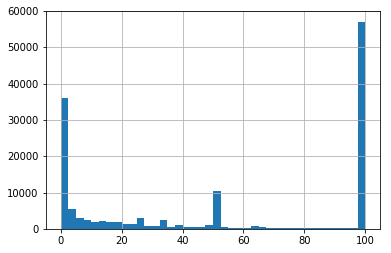

In [35]:
re_owner[re_owner['DALIS'] <= 100.0]['DALIS'].hist(bins = 40);

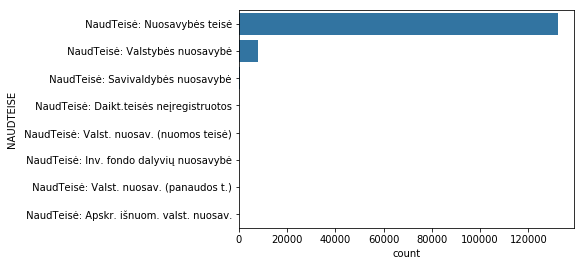

In [44]:
base_color=sb.color_palette()[0]
order_rule=re_owner['NAUDTEISE'].value_counts().index
re22 = re_owner[re_owner['NAUDTEISE'] != ' NaudTeisė: Nuosavybės teisė']
sb.countplot(data=re_owner, y='NAUDTEISE', color=base_color, order=order_rule);

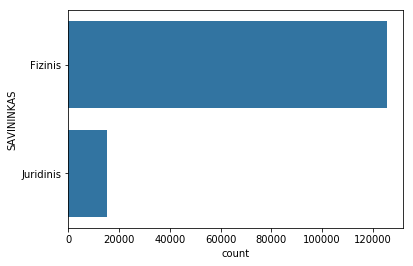

In [39]:
sb.countplot(data=re_owner, y='SAVININKAS', color=base_color);